Pada Collab Notebook kali ini akan mencoba membuat model pembelajaran mesin untuk melakukan klasifikasi gambar kucing dan gambar anjing, langkah pertama import Tensorflow dengan kode dibawah.

In [ ]:
import tensorflow as tf

Lalu lakukan import beberapa modul yang diperlukan

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


Setelah itu lakukan Load datasets dari URL 

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


lalu buat varaibel yang merujuk pada lokasi file tersebut

In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
#direktori latihan untuk gambar kucing
train_cats_dir = os.path.join(train_dir, 'cats')
#direktori latihan untuk gambar anjing
train_dogs_dir = os.path.join(train_dir, 'dogs')
#direktori untuk validasi gambar kucing
validation_cats_dir = os.path.join(validation_dir, 'cats')
#direktori untuk validasi gambar anjing
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Melakukan cek jumlah datasets dari masing-masing direktori

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

Print hasilnya

In [ ]:
print('Jumlah latihan gambar kucing:', num_cats_tr)
print('Jumlah latihan gambar anjing:', num_dogs_tr)

print('Jumlah validasi gambar kucing:', num_cats_val)
print('Jumlah validasi gambar anjing:', num_cats_tr)
print('--')
print("Jumlah gambar latihan : ", total_train)
print("Total Gambar Validasi : ", total_val)

Jumlah latihan gambar kucing: 1000
Jumlah latihan gambar anjing: 1000
Jumlah validasi gambar kucing: 500
Jumlah validasi gambar anjing: 1000
--
Jumlah gambar latihan :  2000
Total Gambar Validasi :  1000


Siapkan variable untuk menyimpan data yang akan digunakan dalam training nanti

In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Menyiapkan ImageDataGenerator untuk training dan validasi

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

Lalu lakukan load image from disk dengan method flow_from_directory . untuk data latihan

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


Lakukan load image from disk dengan method flow_from_directory untuk data validasi

In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


Buat sebuah variabel untuk melakukan visualisasi

In [ ]:
sample_training_images, _ = next(train_data_gen)

Lalu buat method/function yang mengembalikan batch dari datasets

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Lalu jalankan fungsi tersebut

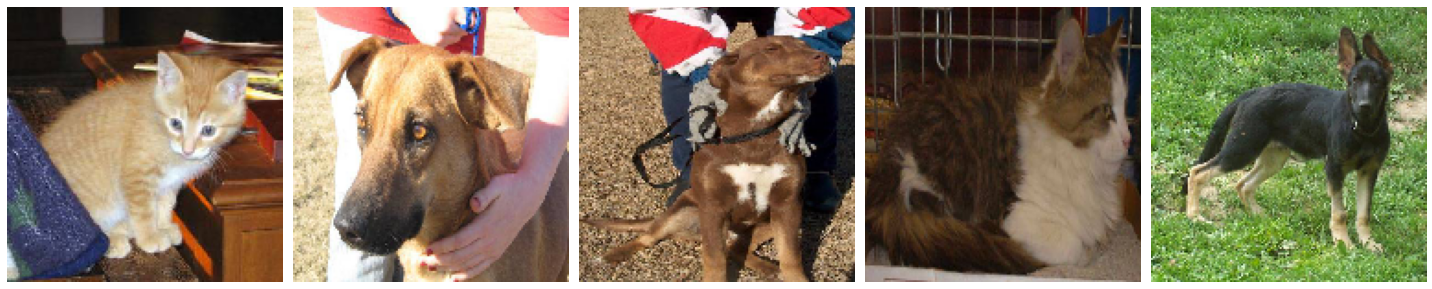

In [ ]:
plotImages(sample_training_images[:5])

Buat modelnya

In [ ]:
model = Sequential([
                    Conv2D(16,3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH,3)),
                    MaxPooling2D(),
                    Conv2D(32,3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Conv2D(64, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1)
])

Lalu lakukan compile pada model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

Lakukan latihan pada model

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 50s 3s/step - loss: 0.9524 - accuracy: 0.5150 - val_loss: 0.6930 - val_accuracy: 0.4933
Epoch 2/15
15/15 [==============================] - 51s 3s/step - loss: 0.6856 - accuracy: 0.5032 - val_loss: 0.6710 - val_accuracy: 0.4944
Epoch 3/15
15/15 [==============================] - 51s 3s/step - loss: 0.6673 - accuracy: 0.5411 - val_loss: 0.6612 - val_accuracy: 0.5290
Epoch 4/15
15/15 [==============================] - 49s 3s/step - loss: 0.6370 - accuracy: 0.6314 - val_loss: 0.6575 - val_accuracy: 0.6172
Epoch 5/15
15/15 [==============================] - 49s 3s/step - loss: 0.5969 - accuracy: 0.6576 - val_loss: 0.6475 - val_accuracy: 0.6585
Epoch 6/15
15/15 [==============================] - 49s 3s/step - loss: 0.5683 - accuracy: 0.6822 - val_loss: 0.6566 - val_accuracy: 0.5993
Epoch 7/15
15/15 [==============================] - 49s 3s/step - loss: 0.5014 - acc

Visualisasikan Plotnya

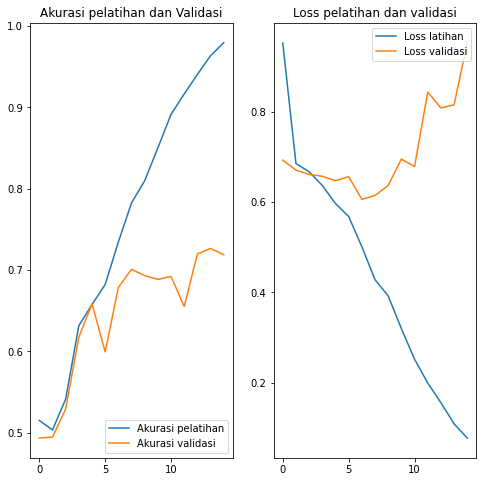

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc, label="Akurasi pelatihan")
plt.plot(epochs_range, val_acc, label="Akurasi validasi")
plt.legend(loc='lower right')
plt.title('Akurasi pelatihan dan Validasi')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Loss latihan')
plt.plot(epochs_range, val_loss, label='Loss validasi')
plt.legend(loc='upper right')
plt.title('Loss pelatihan dan validasi')
plt.show()

Untuk melakukan improve akurasi validasi, kita lakukan overfitting. pertama kita bisa lakukan augment and visualize data dengan data augmentation, pertama kita lakukan horizontal flip lalu tampilkan gambarnya.

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

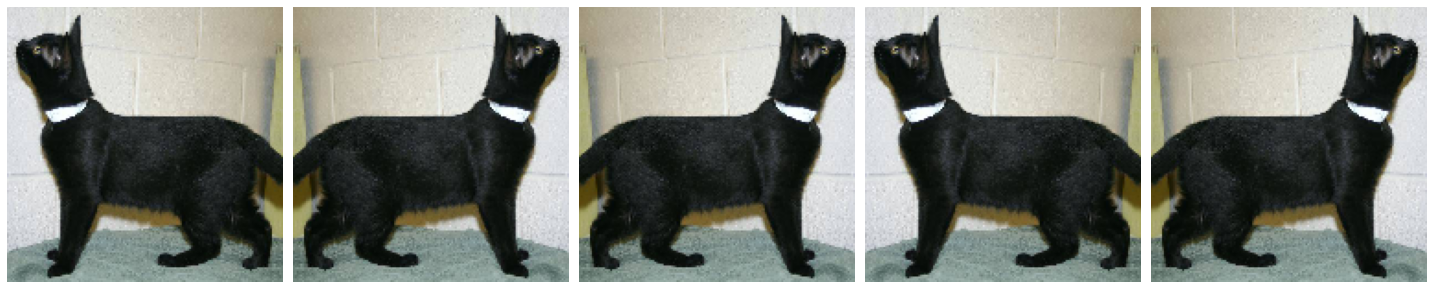

In [ ]:
plotImages(augmented_images)

Putar gambar secara acak

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)


In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


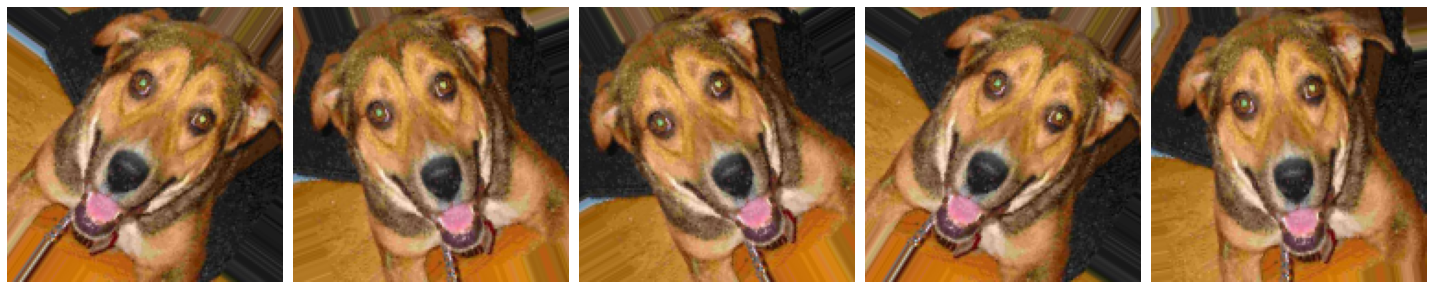

In [ ]:
plotImages(augmented_images)

Lakukan augmentation zoom

In [ ]:
# zoom_range from 0 - 1 where 1 = 100%
image_gen = ImageDataGenerator(rescale=1.255, zoom_range=0.5)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


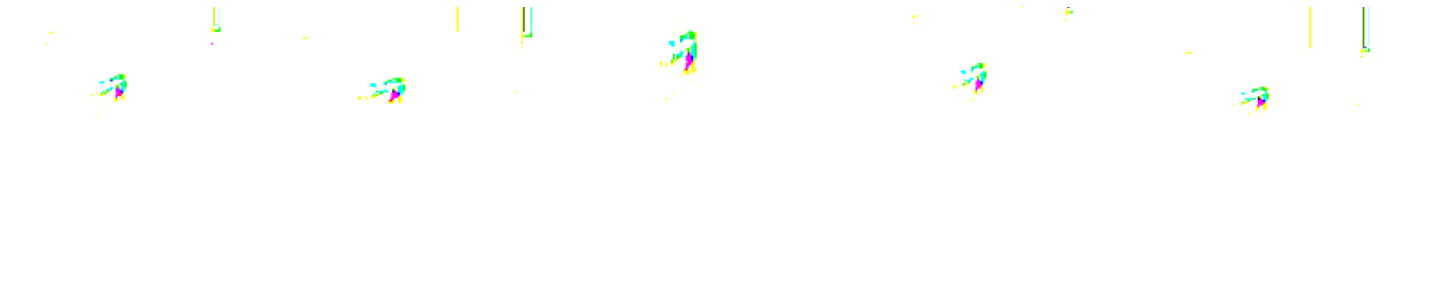

In [ ]:
plotImages(augmented_images)

Satukan semua

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5 
)

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


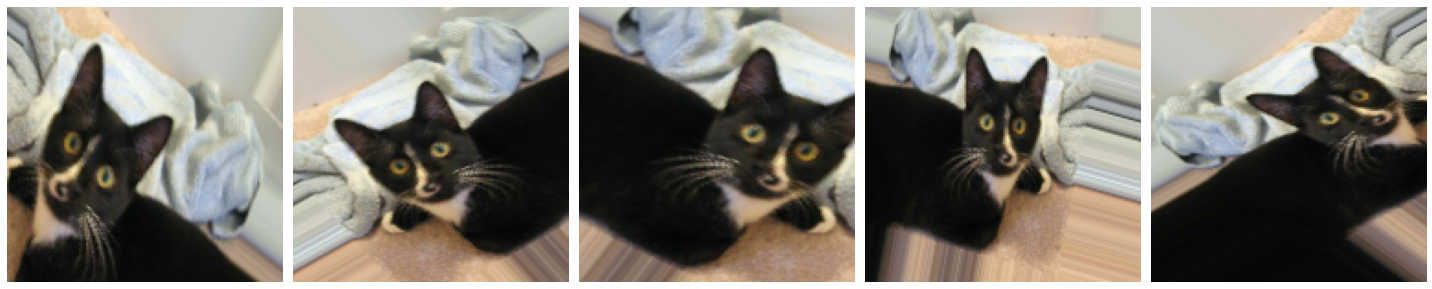

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Buat validation data generator

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 55s 4s/step - loss: 0.8190 - accuracy: 0.5769 - val_loss: 0.6795 - val_accuracy: 0.6295
Epoch 2/15
15/15 [==============================] - 55s 4s/step - loss: 0.6871 - accuracy: 0.5417 - val_loss: 0.6728 - val_accuracy: 0.5123
Epoch 3/15
15/15 [==============================] - 55s 4s/step - loss: 0.6735 - accuracy: 0.5331 - val_loss: 0.6590 - val_accuracy: 0.6183
Epoch 4/15
15/15 [==============================] - 55s 4s/step - loss: 0.6577 - accuracy: 0.5459 - val_loss: 0.6504 - val_accuracy: 0.6585
Epoch 5/15
15/15 [==============================] - 55s 4s/step - loss: 0.6612 - accuracy: 0.5791 - val_loss: 0.6308 - val_accuracy: 0.5815
Epoch 6/15
15/15 [==============================] - 60s 4s/step - loss: 0.6435 - accuracy: 0.6036 - val_loss: 0.6062 - val_accuracy: 0.6217
Epoch 7/15
 4/15 [=======>......................] - ETA: 28s - loss: 0.6281 - accuracy: 0.6152